#Код для проверки пропусков и ошибок

In [3]:
import pandas as pd

# Загрузка данных
stocks = ['AAPL', 'MSFT', 'GOOGL']
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'XRP-USD']

# Проверка данных по акциям
print("Проверка данных по акциям:")
for ticker in stocks:
    data = pd.read_csv(f'../data/stocks/{ticker}.csv', index_col='Date', parse_dates=True)
    print(f"\nАнализ данных для {ticker}:")
    print(data.info())  # Общая информация о данных
    print(data.isnull().sum())  # Пропуски
    print(data.describe())  # Описательная статистика

# Проверка данных по криптовалютам
print("\nПроверка данных по криптовалютам:")
for ticker in cryptos:
    data = pd.read_csv(f'../data/cryptos/{ticker}.csv', index_col='Date', parse_dates=True)
    print(f"\nАнализ данных для {ticker}:")
    print(data.info())  # Общая информация о данных
    print(data.isnull().sum())  # Пропуски
    print(data.describe())  # Описательная статистика

Проверка данных по акциям:

Анализ данных для AAPL:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2023-01-03 to 2023-09-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    187 non-null    float64
 1   High    187 non-null    float64
 2   Low     187 non-null    float64
 3   Close   187 non-null    float64
 4   Volume  187 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 8.8 KB
None
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
             Open        High         Low       Close        Volume
count  187.000000  187.000000  187.000000  187.000000  1.870000e+02
mean   166.885427  168.510726  165.574231  167.120494  6.133250e+07
std     17.831894   17.594649   17.806615   17.590940  1.829274e+07
min    124.698663  126.440361  122.877820  123.718979  3.145820e+07
25%    152.186851  154.513191  150.385236  152.686821  4.912860e+07
50%    171.234430  172.075386 

Код для анализа выбросов

Анализ выбросов для акций:

Выбросы для AAPL:


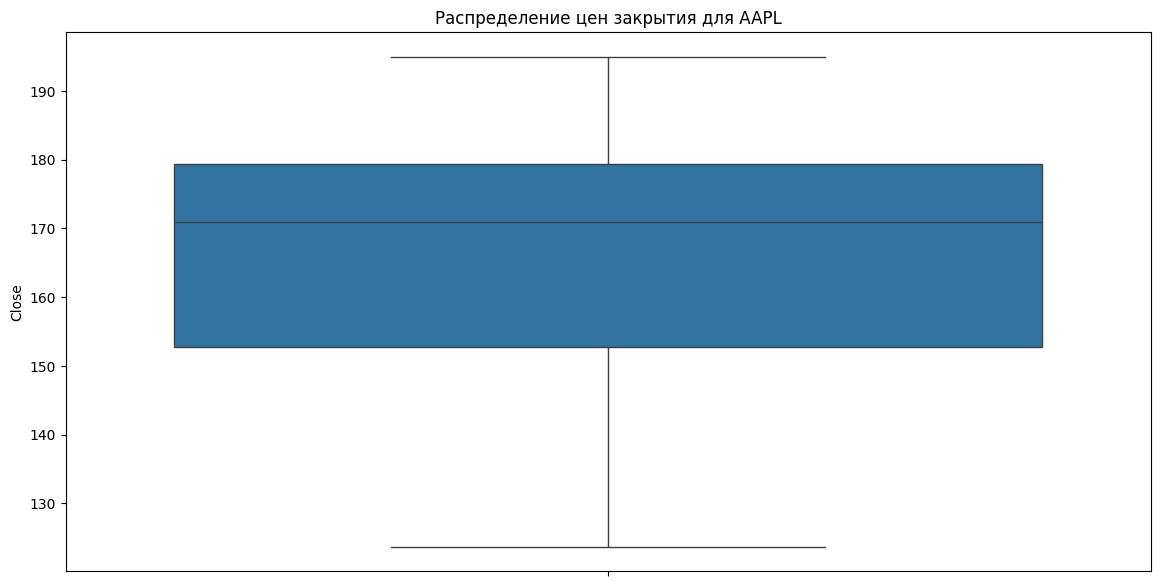


Выбросы для MSFT:


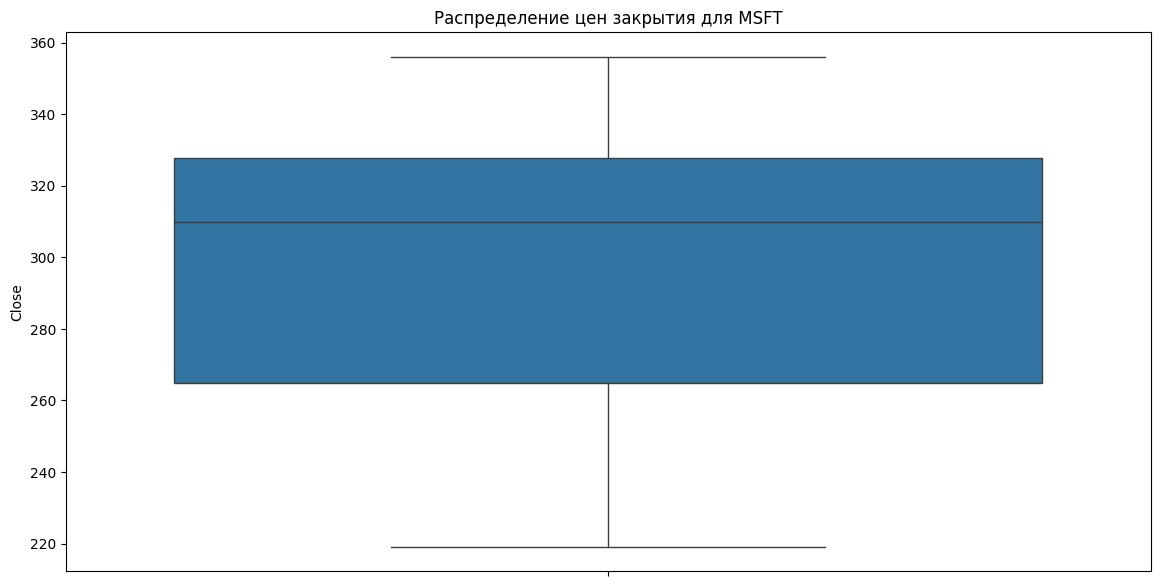


Выбросы для GOOGL:


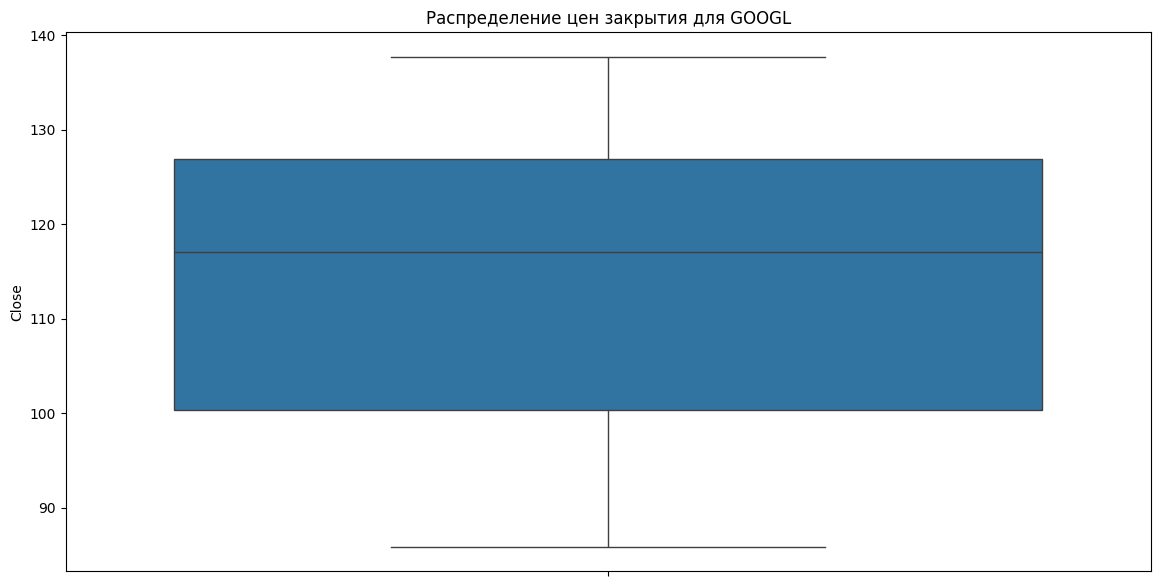


Анализ выбросов для криптовалют:

Выбросы для BTC-USD:


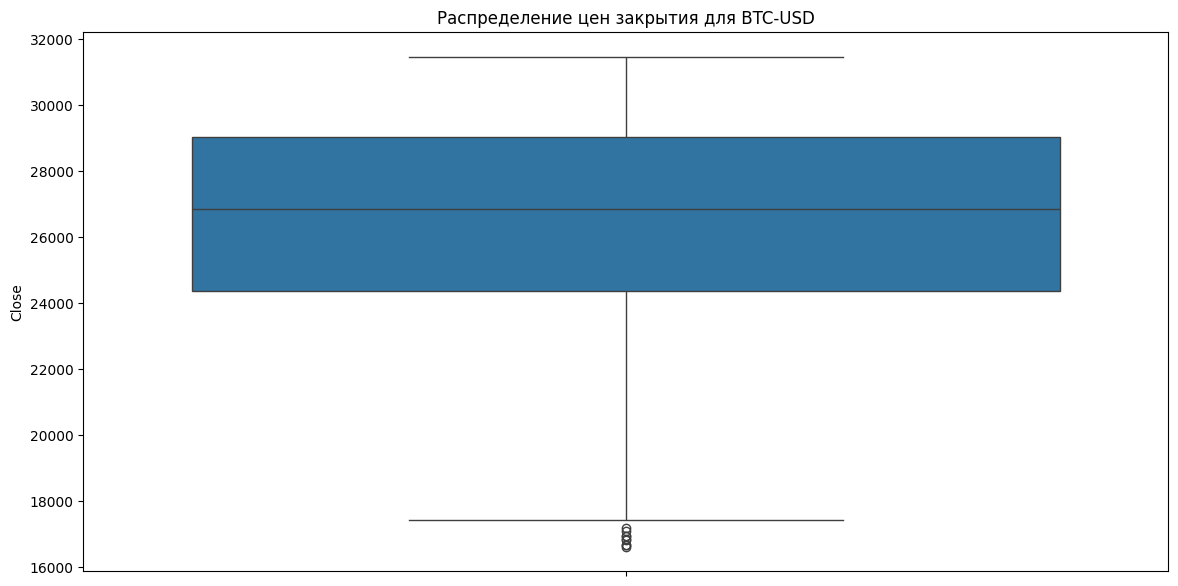


Выбросы для ETH-USD:


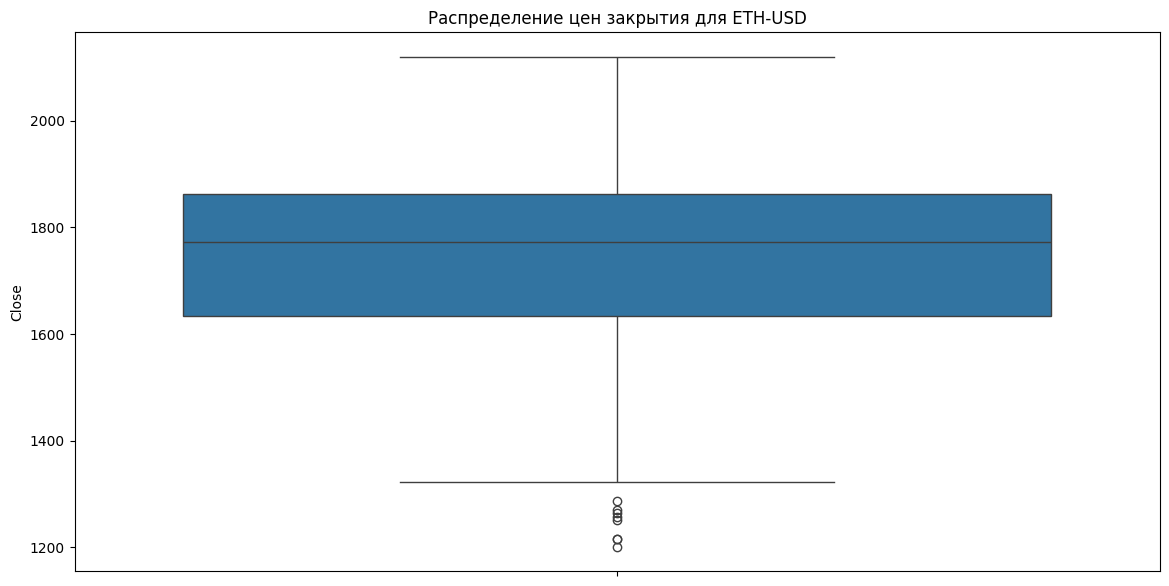


Выбросы для SOL-USD:


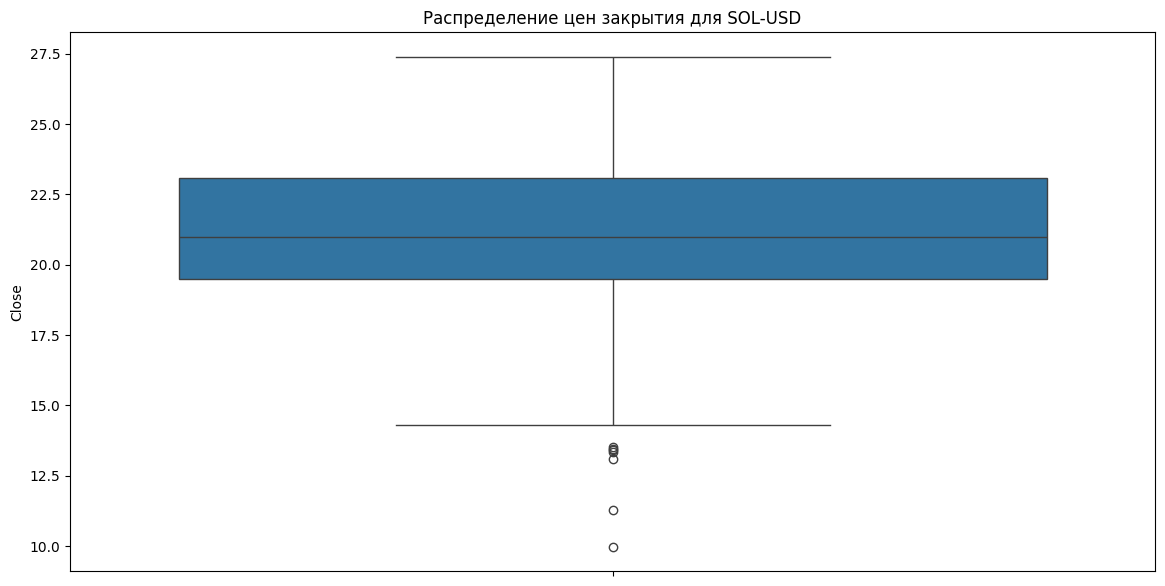


Выбросы для XRP-USD:


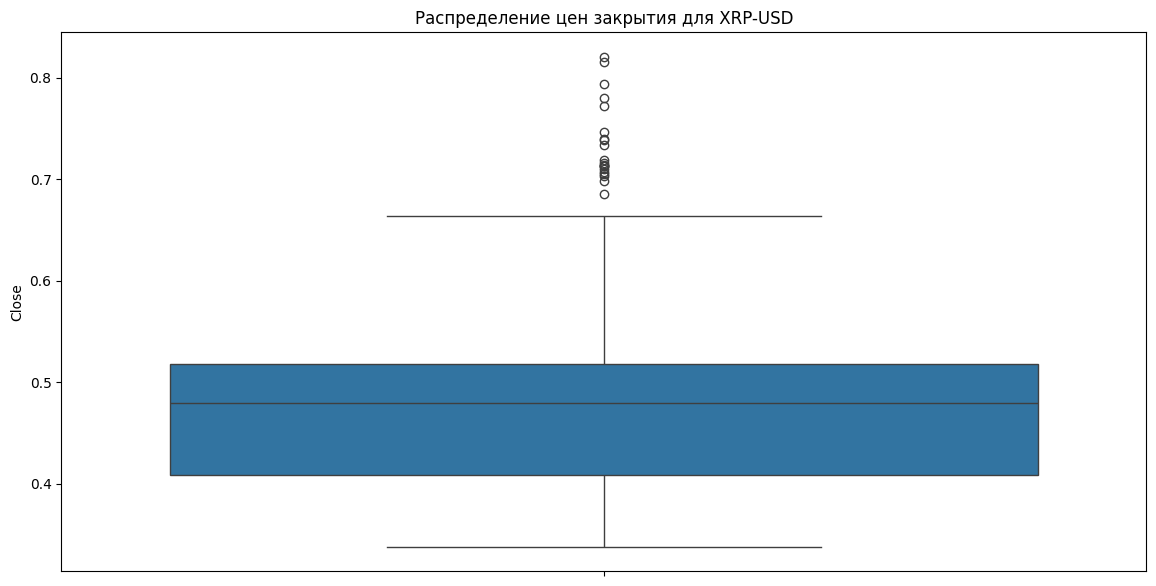

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для анализа выбросов
def analyze_outliers(data, ticker):
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=data['Close'])
    plt.title(f'Распределение цен закрытия для {ticker}')
    plt.show()

# Анализ выбросов для акций
print("Анализ выбросов для акций:")
for ticker in stocks:
    data = pd.read_csv(f'../data/stocks/{ticker}.csv', index_col='Date', parse_dates=True)
    print(f"\nВыбросы для {ticker}:")
    analyze_outliers(data, ticker)

# Анализ выбросов для криптовалют
print("\nАнализ выбросов для криптовалют:")
for ticker in cryptos:
    data = pd.read_csv(f'../data/cryptos/{ticker}.csv', index_col='Date', parse_dates=True)
    print(f"\nВыбросы для {ticker}:")
    analyze_outliers(data, ticker)


Выбросы в данных:

Выбросы могут быть вызваны ошибками в данных (например, ошибочные значения) или реальными событиями (например, резкие изменения цен на рынке).

Для оценки выбросов можно использовать:

Boxplot: Визуализация распределения данных.

Z-оценка (Z-score): Определение аномальных значений на основе стандартного отклонения.

IQR (Interquartile Range): Определение выбросов на основе межквартильного размаха.

Пример кода для оценки выбросов с использованием Z-оценки:

In [9]:
import scipy.stats as stats
from scipy.stats import zscore

# Функция для оценки выбросов с использованием Z-оценки
def detect_outliers_zscore(data, threshold=3):
    z_scores = zscore(data['Close'])
    outliers = data[(z_scores > threshold) | (z_scores < -threshold)]
    return outliers

# Проверка выбросов для акций
print("Выбросы в данных по акциям:")
for ticker in stocks:
    data = pd.read_csv(f'../data/stocks/{ticker}.csv', index_col='Date', parse_dates=True)
    outliers = detect_outliers_zscore(data)
    print(f"\nВыбросы для {ticker}:")
    print(outliers)

# Проверка выбросов для криптовалют
print("\nВыбросы в данных по криптовалютам:")
for ticker in cryptos:
    data = pd.read_csv(f'../data/cryptos/{ticker}.csv', index_col='Date', parse_dates=True)
    outliers = detect_outliers_zscore(data)
    print(f"\nВыбросы для {ticker}:")
    print(outliers)

Выбросы в данных по акциям:

Выбросы для AAPL:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume]
Index: []

Выбросы для MSFT:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume]
Index: []

Выбросы для GOOGL:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume]
Index: []

Выбросы в данных по криптовалютам:

Выбросы для BTC-USD:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume]
Index: []

Выбросы для ETH-USD:
                   Open         High          Low        Close      Volume
Date                                                                      
2023-01-01  1196.713623  1203.475342  1192.885376  1200.964844  2399674550
2023-01-02  1201.103271  1219.860596  1195.214966  1214.656616  3765758498
2023-01-03  1214.744019  1219.095337  1207.491577  1214.778809  3392972131

Выбросы для SOL-USD:
                Open       High       Low      Close     Volume
Date                                                           
2023-01-01  9.961036  10.052801  9.72